In [ ]:
!pip install prophet

In [ ]:
!pip install yfinance

In [1]:
import yfinance as yf
import prophet as Prophet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


C:\Users\Furka\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
start_date = "2020-01-02"

end_date = "2022-09-01"

train_end_date = "2022-08-14"

In [3]:
ticker_list = ["GOOG", "VTI"]

data = yf.download(ticker_list, start = start_date, end= end_date)[["Close"]]

data.head()

[*********************100%***********************]  2 of 2 completed


Close            
                 GOOG         VTI
Date                             
2020-01-02  68.368500  164.979996
2020-01-03  68.032997  163.929993
2020-01-06  69.710503  164.490005
2020-01-07  69.667000  164.100006
2020-01-08  70.216003  164.910004

In [4]:
data.shape

(672, 2)

In [5]:
len(data)

672

In [6]:
data.describe().T

count        mean        std         min         25%        50%  \
Close GOOG  672.0  105.786198  28.218500   52.831001   76.034252  111.28875   
      VTI   672.0  197.082946  30.537813  111.910004  171.127502  203.62500   

                   75%         max  
Close GOOG  132.381500  150.709000  
      VTI   222.850006  242.970001

In [7]:
data.columns = data.columns.droplevel(0)

In [8]:
data.head()

,GOOG,VTI
Date,,
2020-01-02,68.368500,164.979996
2020-01-03,68.032997,163.929993
2020-01-06,69.710503,164.490005
2020-01-07,69.667000,164.100006
2020-01-08,70.216003,164.910004


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2020-01-02 to 2022-08-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    672 non-null    float64
 1   VTI     672 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


## add more visualization on time series data


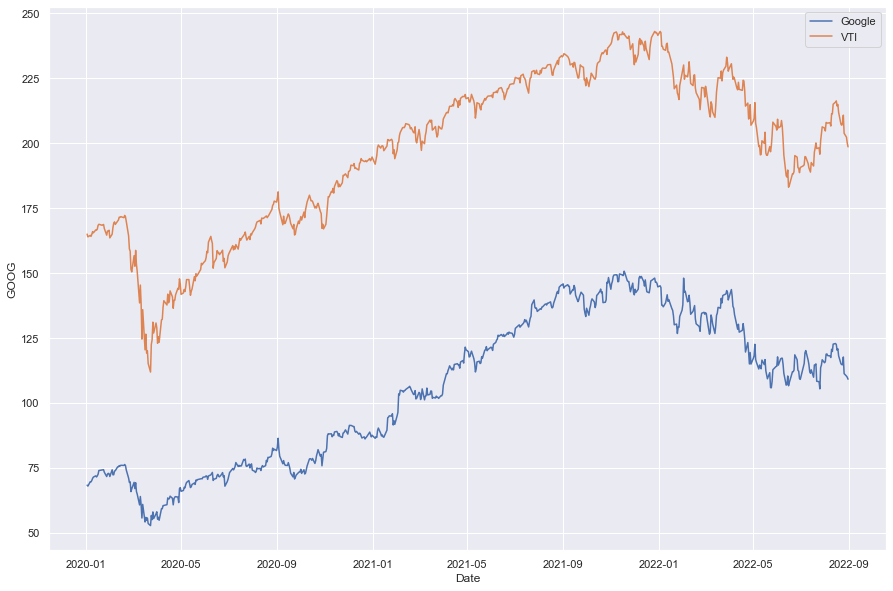

In [10]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x= data.index, y=data.GOOG)
sns.lineplot(x= data.index, y=data.VTI)
plt.legend(["Google", "VTI"])
plt.show()

In [11]:
data = data.reset_index()

In [12]:
data.columns = ["ds", "y", "VTI"]

In [13]:
data.head()

,ds,y,VTI
0,2020-01-02,68.368500,164.979996
1,2020-01-03,68.032997,163.929993
2,2020-01-06,69.710503,164.490005
3,2020-01-07,69.667000,164.100006
4,2020-01-08,70.216003,164.910004


In [14]:
data.corrwith(data["y"])

y      1.000000
VTI    0.963487
dtype: float64

In [15]:
train = data[data["ds"] <= train_end_date]
test = data[data["ds"] > train_end_date]

In [16]:
test.shape

(13, 3)

In [17]:
train.shape

(659, 3)

In [18]:
train["ds"].min()

Timestamp('2020-01-02 00:00:00')

In [19]:
train["ds"].max()

Timestamp('2022-08-12 00:00:00')

In [20]:
test["ds"].min()

Timestamp('2022-08-15 00:00:00')

In [21]:
test["ds"].max()

Timestamp('2022-08-31 00:00:00')

In [22]:
model_baseline = Prophet.Prophet()

In [23]:
model_baseline.fit(train)

23:08:51 - cmdstanpy - INFO - Chain [1] start processing
23:08:51 - cmdstanpy - INFO - Chain [1] done processing


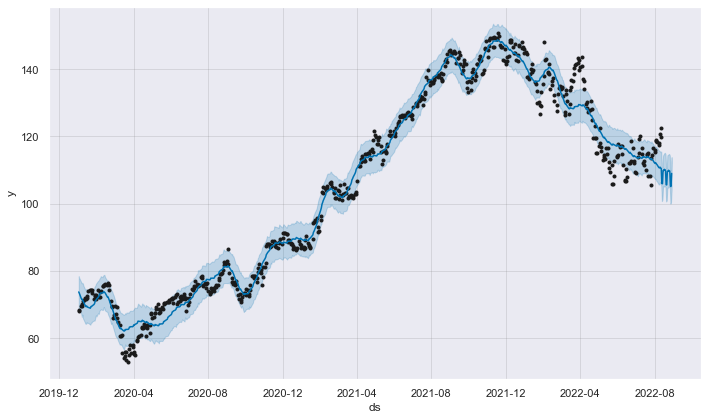

In [24]:
future_baseline = model_baseline.make_future_dataframe(periods=17)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline);

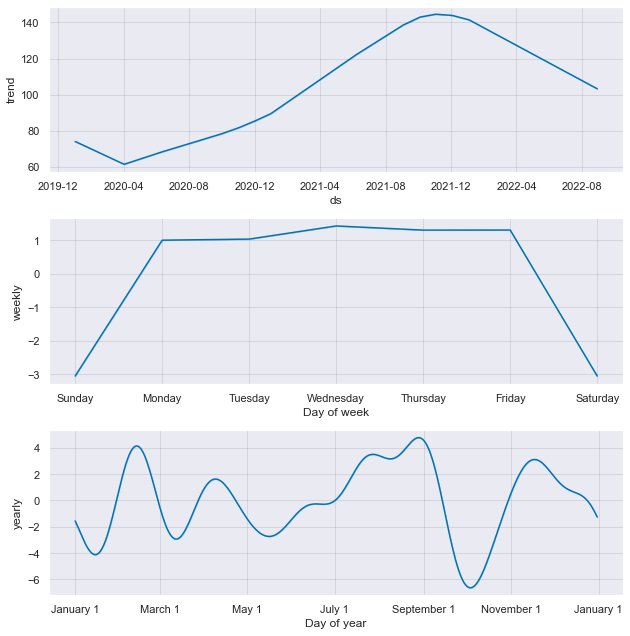

In [25]:
model_baseline.plot_components(forecast_baseline);

In [26]:
forecast_baseline.shape

(676, 19)

In [27]:
forecast_baseline.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,74.072569,68.777980,78.456089,74.072569,74.072569,-0.305999,-0.305999,-0.305999,1.308865,1.308865,1.308865,-1.614864,-1.614864,-1.614864,0.0,0.0,0.0,73.766570
1,2020-01-03,73.933716,68.391049,77.911461,73.933716,73.933716,-0.553556,-0.553556,-0.553556,1.310442,1.310442,1.310442,-1.863998,-1.863998,-1.863998,0.0,0.0,0.0,73.380159
2,2020-01-06,73.517155,67.390718,76.730107,73.517155,73.517155,-1.615116,-1.615116,-1.615116,1.007721,1.007721,1.007721,-2.622837,-2.622837,-2.622837,0.0,0.0,0.0,71.902039
3,2020-01-07,73.378302,66.349739,76.299572,73.378302,73.378302,-1.826906,-1.826906,-1.826906,1.040484,1.040484,1.040484,-2.867390,-2.867390,-2.867390,0.0,0.0,0.0,71.551396
4,2020-01-08,73.239448,67.026727,76.494492,73.239448,73.239448,-1.668215,-1.668215,-1.668215,1.432941,1.432941,1.432941,-3.101156,-3.101156,-3.101156,0.0,0.0,0.0,71.571234


In [28]:
performance_baseline = pd.merge(test, forecast_baseline[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [29]:
performance_baseline.shape

(11, 6)

In [30]:
performance_baseline

,ds,y,VTI,yhat,yhat_lower,yhat_upper
0,2022-08-15,122.879997,215.779999,109.926409,105.223483,114.371090
1,2022-08-16,122.510002,216.240005,109.894175,105.207306,114.709795
2,2022-08-17,120.320000,214.300003,110.233393,105.064985,115.038094
3,2022-08-18,120.860001,214.860001,110.065783,105.268688,115.157956
4,2022-08-19,118.120003,211.789993,110.031058,104.970021,114.792803
5,2022-08-22,115.070000,207.259995,109.632757,104.750855,114.421045
6,2022-08-23,114.769997,206.869995,109.626675,104.765116,114.512263
7,2022-08-24,114.699997,207.740005,109.970605,105.179817,114.723255
8,2022-08-25,117.699997,210.750000,109.784472,104.882079,114.801898
9,2022-08-26,111.300003,203.770004,109.706628,105.039227,114.371550


In [31]:
performance_baseline_MAE = mean_absolute_error(performance_baseline["y"], performance_baseline["yhat"])
performance_baseline_MAE

7.333910942116933

In [32]:
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline["y"], performance_baseline["yhat"])
performance_baseline_MAPE

0.061527476924947574

In [33]:
model_season = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True)

In [34]:
model_season.fit(train)

23:08:54 - cmdstanpy - INFO - Chain [1] start processing
23:08:54 - cmdstanpy - INFO - Chain [1] done processing


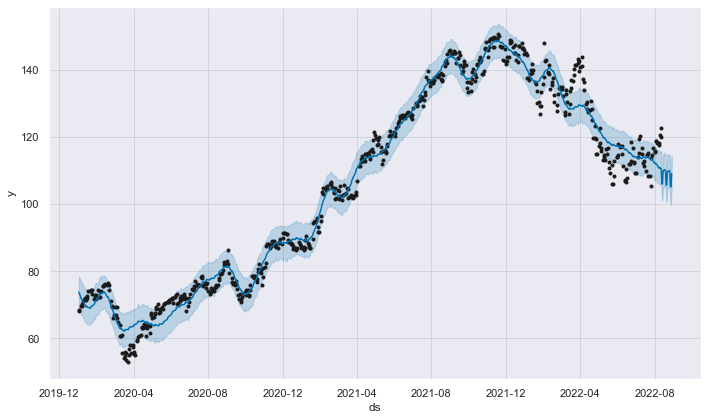

In [35]:
future_season = model_season.make_future_dataframe(periods=17)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season);

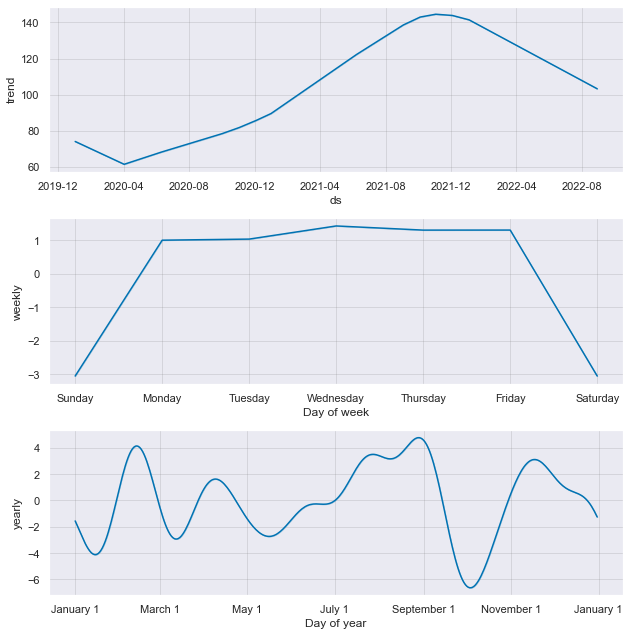

In [36]:
model_season.plot_components(forecast_season);

In [37]:
performance_season = pd.merge(test, forecast_season[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [38]:
performance_season.shape

(11, 6)

In [39]:
performance_baseline

,ds,y,VTI,yhat,yhat_lower,yhat_upper
0,2022-08-15,122.879997,215.779999,109.926409,105.223483,114.371090
1,2022-08-16,122.510002,216.240005,109.894175,105.207306,114.709795
2,2022-08-17,120.320000,214.300003,110.233393,105.064985,115.038094
3,2022-08-18,120.860001,214.860001,110.065783,105.268688,115.157956
4,2022-08-19,118.120003,211.789993,110.031058,104.970021,114.792803
5,2022-08-22,115.070000,207.259995,109.632757,104.750855,114.421045
6,2022-08-23,114.769997,206.869995,109.626675,104.765116,114.512263
7,2022-08-24,114.699997,207.740005,109.970605,105.179817,114.723255
8,2022-08-25,117.699997,210.750000,109.784472,104.882079,114.801898
9,2022-08-26,111.300003,203.770004,109.706628,105.039227,114.371550


In [40]:
performance_season

,ds,y,VTI,yhat,yhat_lower,yhat_upper
0,2022-08-15,122.879997,215.779999,109.926409,104.956276,114.880723
1,2022-08-16,122.510002,216.240005,109.894175,104.791076,114.642356
2,2022-08-17,120.320000,214.300003,110.233393,105.196662,115.377102
3,2022-08-18,120.860001,214.860001,110.065783,105.310589,114.757087
4,2022-08-19,118.120003,211.789993,110.031058,105.082167,114.784254
5,2022-08-22,115.070000,207.259995,109.632757,104.898592,114.813215
6,2022-08-23,114.769997,206.869995,109.626675,104.545213,114.496357
7,2022-08-24,114.699997,207.740005,109.970605,105.085140,114.585353
8,2022-08-25,117.699997,210.750000,109.784472,105.088159,114.762573
9,2022-08-26,111.300003,203.770004,109.706628,104.806045,114.464858


In [41]:
performance_season_mae = mean_absolute_error(performance_season["y"], performance_season["yhat"])
performance_season_mae

7.333910942116933

In [42]:
performance_season_mape = mean_absolute_percentage_error(performance_baseline["y"], performance_baseline["yhat"])
performance_season_mape

0.061527476924947574

In [43]:
model_multivariate = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True)

In [44]:
model_multivariate.add_regressor("VTI", standardize=False)
model_multivariate.fit(train)

23:08:56 - cmdstanpy - INFO - Chain [1] start processing
23:08:56 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future_multivariate = model_multivariate.make_future_dataframe(periods=17)
future_multivariate = pd.merge(future_multivariate, data[["ds", "VTI"]], on="ds", how="inner")
future_multivariate = future_multivariate.fillna(method="ffill")
future_multivariate.tail()

,ds,VTI
665,2022-08-23,206.869995
666,2022-08-24,207.740005
667,2022-08-25,210.750000
668,2022-08-26,203.770004
669,2022-08-29,202.279999


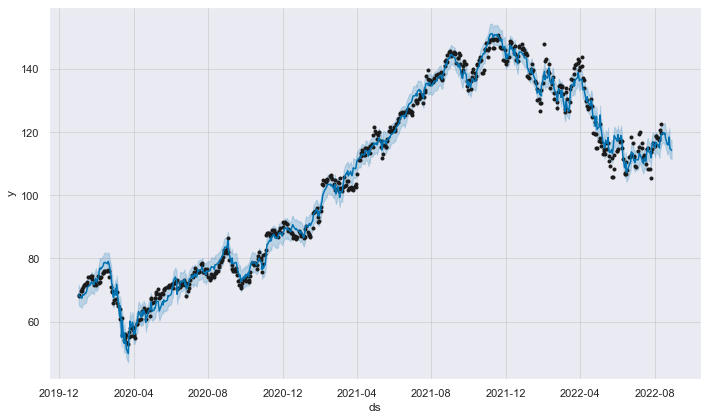

In [46]:
forecast_multivariate = model_multivariate.predict(future_multivariate)
model_multivariate.plot(forecast_multivariate);

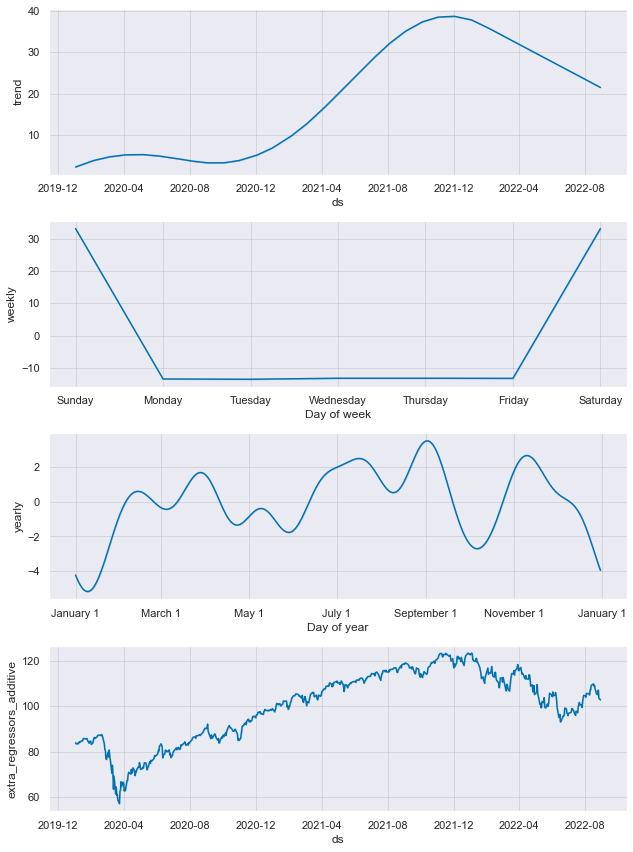

In [47]:
model_multivariate.plot_components(forecast_multivariate);

In [48]:
performance_multivariate = pd.merge(test, forecast_multivariate[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [49]:
performance_multivariate.shape

(11, 6)

In [50]:
performance_multivariate

,ds,y,VTI,yhat,yhat_lower,yhat_upper
0,2022-08-15,122.879997,215.779999,119.651702,116.694711,122.570135
1,2022-08-16,122.510002,216.240005,119.864422,116.840089,122.850990
2,2022-08-17,120.320000,214.300003,119.270646,116.100882,122.404653
3,2022-08-18,120.860001,214.860001,119.658820,116.550047,122.896316
4,2022-08-19,118.120003,211.789993,118.169272,115.187450,121.160040
5,2022-08-22,115.070000,207.259995,116.048934,112.932610,119.075286
6,2022-08-23,114.769997,206.869995,115.895915,112.991503,118.898688
7,2022-08-24,114.699997,207.740005,116.774798,113.717770,119.900021
8,2022-08-25,117.699997,210.750000,118.429018,115.163851,121.222522
9,2022-08-26,111.300003,203.770004,114.947761,111.915067,117.923498


In [51]:
performance_multivariate_mae = mean_absolute_error(performance_multivariate["y"], performance_multivariate["yhat"])
performance_multivariate_mae

1.8731383596941746

In [52]:
performance_season_mape = mean_absolute_percentage_error(performance_baseline["y"], performance_baseline["yhat"])
performance_season_mape

0.061527476924947574

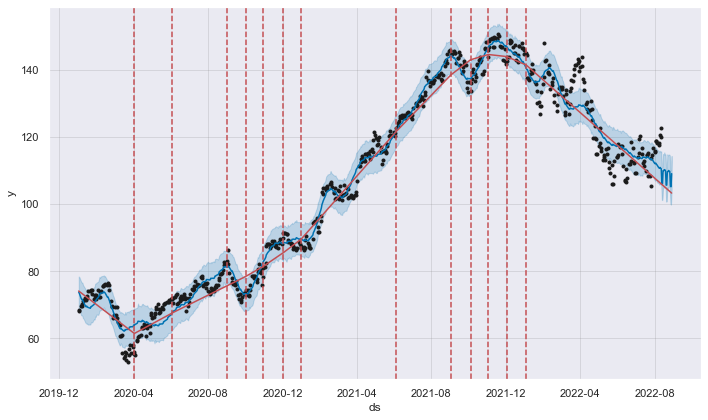

In [53]:
from prophet.plot import add_changepoints_to_plot
fig = model_season.plot(forecast_season)
a = add_changepoints_to_plot(fig.gca(), model_baseline, forecast_season)


In [54]:
# COVID time window
COVID = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,    
})
# Super Bowl time window
superbowl = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2020-02-02', '2021-02-07']),
    'lower_window': -7,
    'upper_window': 1,    
})
# Combine all events
events = pd.concat((COVID, superbowl))
# Take a look at the events data
events

,holiday,ds,lower_window,upper_window
0,COVID,2020-03-15,-15,15
0,superbowl,2020-02-02,-7,1
1,superbowl,2021-02-07,-7,1


In [55]:
# Add holidays
model_holiday = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events)
# Add built-in country-specific holidays
model_holiday.add_country_holidays(country_name='US')
# Add regressor
model_holiday.add_regressor('VTI', standardize=False)
# Fit the model on the training dataset
model_holiday.fit(train)
# All the holidays and events
model_holiday.train_holiday_names

23:08:58 - cmdstanpy - INFO - Chain [1] start processing
23:08:59 - cmdstanpy - INFO - Chain [1] done processing


0                                               COVID
1                                           superbowl
2                                      New Year's Day
3                          Martin Luther King Jr. Day
4                               Washington's Birthday
5                                        Memorial Day
6                                    Independence Day
7                         Independence Day (Observed)
8                                           Labor Day
9                                        Columbus Day
10                                       Veterans Day
11                                       Thanksgiving
12                                      Christmas Day
13                          New Year's Day (Observed)
14               Juneteenth National Independence Day
15    Juneteenth National Independence Day (Observed)
16                           Christmas Day (Observed)
dtype: object

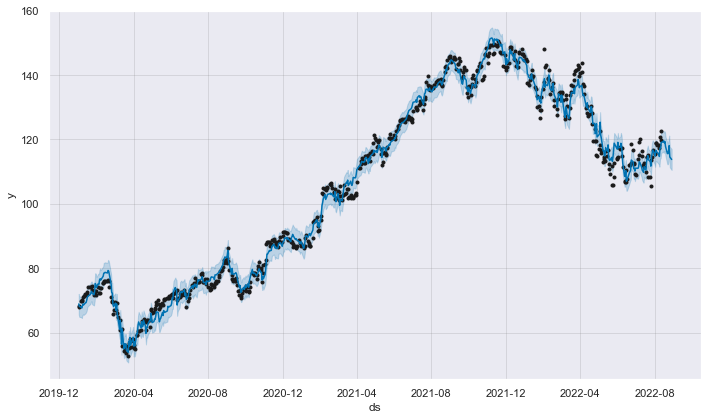

In [56]:
# Create the time range for the forecast
future_holiday = model_holiday.make_future_dataframe(periods=17)
# Append the regressor values
future_holiday = pd.merge(future_holiday, data[['ds', 'VTI']], on='ds', how='inner')
# Fill the missing values with the previous value
future_holiday = future_holiday.fillna(method='ffill')
# Make prediction
forecast_holiday = model_holiday.predict(future_holiday)
# Visualize the forecast
model_holiday.plot(forecast_holiday); # Add semi-colon to remove the duplicated chart

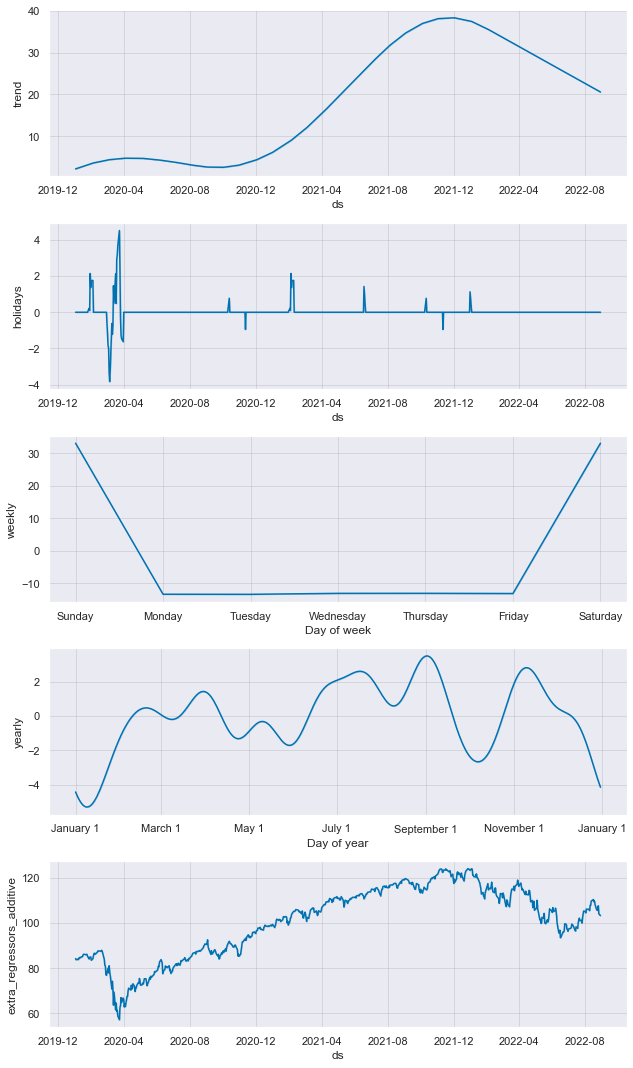

In [57]:
model_holiday.plot_components(forecast_holiday);

In [58]:
# Merge actual and predicted values
performance_holiday = pd.merge(test, forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-17:], on='ds')
# Check MAE value
performance_holiday_MAE = mean_absolute_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAE for the holiday/event model is {performance_holiday_MAE}')
# Check MAPE value
performance_holiday_MAPE = mean_absolute_percentage_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAPE for the holiday/event model is {performance_holiday_MAPE}')

The MAE for the holiday/event model is 1.8044394756562965
The MAPE for the holiday/event model is 0.015457785815145304


__mape decreased__ holiday ✔

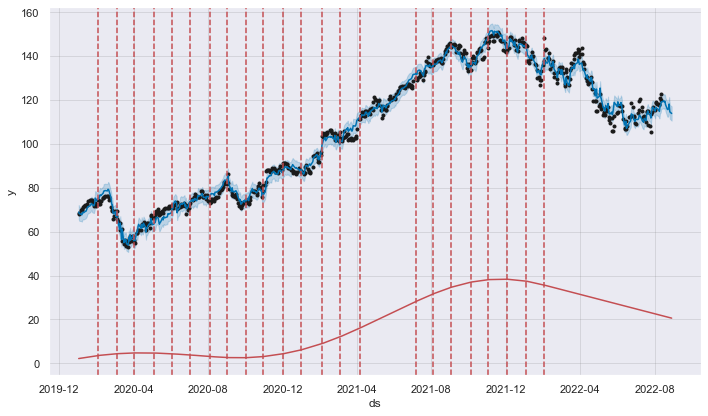

In [59]:
from prophet.plot import add_changepoints_to_plot
fig = model_holiday.plot(forecast_holiday)
a = add_changepoints_to_plot(fig.gca(), model_holiday, forecast_holiday)

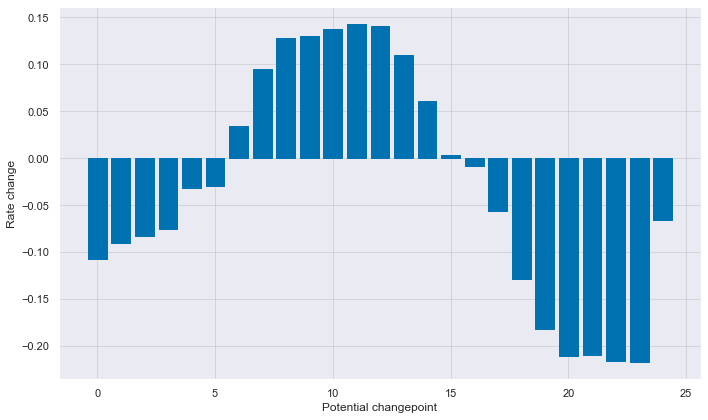

In [60]:
deltas = model_holiday.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas, facecolor='#0072B2', edgecolor='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

# TO-DO

## hyperparameter tuning
- changepoint_range
- growth
- changepoints

In [61]:
from prophet.diagnostics import cross_validation, performance_metrics

In [74]:
model_holiday_cv = cross_validation(model=model_holiday,
                                   initial="366 days",
                                   period="61 days", 
                                   horizon="122 days",
                                   parallel="processes")
model_holiday_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-10,102.327006,100.930409,103.755961,104.768997,2021-02-09
1,2021-02-11,102.981971,101.630956,104.397715,104.794502,2021-02-09
2,2021-02-12,103.842043,102.478409,105.215735,105.205498,2021-02-09
3,2021-02-16,104.728632,103.373435,106.157189,106.095001,2021-02-09
4,2021-02-17,104.876205,103.502079,106.286501,106.415497,2021-02-09


In [75]:
model_holiday_cv.shape

(676, 6)

In [76]:
performance_model_holiday_cv = performance_metrics(model_holiday_cv, rolling_window=1)

In [77]:
performance_model_holiday_cv.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,122 days,117.644279,10.846395,9.076538,0.071714,0.070202,0.068546,0.140533


### hyperparameter changes

In [61]:
from prophet.diagnostics import cross_validation, performance_metrics

In [78]:
model_holiday_cv = cross_validation(model=model_baseline,
                                   initial="366 days",
                                   period="61 days", 
                                   horizon="122 days",
                                   parallel="processes")
model_holiday_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-10,101.521843,99.226039,103.490725,104.768997,2021-02-09
1,2021-02-11,101.714508,99.716823,103.658473,104.794502,2021-02-09
2,2021-02-12,101.837255,99.689701,103.802233,105.205498,2021-02-09
3,2021-02-16,102.505583,100.415975,104.468126,106.095001,2021-02-09
4,2021-02-17,102.766351,100.706916,104.895865,106.415497,2021-02-09


In [79]:
model_holiday_cv.shape

(676, 6)

In [80]:
performance_model_holiday_cv = performance_metrics(model_holiday_cv, rolling_window=1)

In [81]:
performance_model_holiday_cv.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,122 days,363.753782,19.07233,15.078385,0.120539,0.090849,0.111529,0.12574


In [87]:
performance_model_holiday_cv["mape"][0]

0.12053871370612762

In [82]:
# Initiate the model
manual_model = Prophet.Prophet(changepoint_range=0.9)
# Fit the model on the training dataset
manual_model.fit(data)
# Cross validation
manual_model_cv = cross_validation(manual_model, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")
# Model performance metrics
manual_model_p = performance_metrics(manual_model_cv, rolling_window=1)
manual_model_p['mape'].values[0]

01:18:09 - cmdstanpy - INFO - Chain [1] start processing
01:18:09 - cmdstanpy - INFO - Chain [1] done processing


0.08285103648278126

__mape decreased__ changepoint ✔

In [100]:
# Add holidays
model_holiday_prior = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events, holidays_prior_scale=0.05)
# Add built-in country-specific holidays
model_holiday_prior.add_country_holidays(country_name='US')
# Add regressor
model_holiday_prior.add_regressor('VTI', standardize=False)
# Fit the model on the training dataset
model_holiday_prior.fit(train)

# Create the time range for the forecast
future_holiday_prior = model_holiday_prior.make_future_dataframe(periods=17)
# Append the regressor values
future_holiday_prior = pd.merge(future_holiday_prior, data[['ds', 'VTI']], on='ds', how='inner')
# Fill the missing values with the previous value
future_holiday_prior = future_holiday.fillna(method='ffill')
# Make prediction
forecast_holiday_prior = model_holiday_prior.predict(future_holiday)

# Merge actual and predicted values
performance_holiday_prior = pd.merge(test, forecast_holiday_prior[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-17:], on='ds')
# Check MAE value
performance_holiday_prior_MAE = mean_absolute_error(performance_holiday_prior['y'], performance_holiday_prior['yhat'])
print(f'The MAE for the holiday/event/prior model is {performance_holiday_prior_MAE}')
# Check MAPE value
performance_holiday_prior_MAPE = mean_absolute_percentage_error(performance_holiday_prior['y'], performance_holiday_prior['yhat'])
print(f'The MAPE for the holiday/event/prior model is {performance_holiday_prior_MAPE}')

01:54:00 - cmdstanpy - INFO - Chain [1] start processing
01:54:01 - cmdstanpy - INFO - Chain [1] done processing


The MAE for the holiday/event/prior model is 1.7678562345195068
The MAPE for the holiday/event/prior model is 0.01520870176606634


__mape decreased__ holidays_prior_scale ✔

In [114]:
type(events)

pandas.core.frame.DataFrame

In [115]:
import itertools
# Set up parameter grid
param_grid = {
    'holidays_prior_scale': [0.05, 0.5, 1],
    'changepoint_prior_scale': [0.05, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 10],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet.Prophet(**params, holidays=events).fit(data)  
    # Cross-validation
    df_cv = cross_validation(m, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mape'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
print(best_params)

02:43:59 - cmdstanpy - INFO - Chain [1] start processing
02:43:59 - cmdstanpy - INFO - Chain [1] done processing
02:44:10 - cmdstanpy - INFO - Chain [1] start processing
02:44:11 - cmdstanpy - INFO - Chain [1] done processing
02:44:21 - cmdstanpy - INFO - Chain [1] start processing
02:44:21 - cmdstanpy - INFO - Chain [1] done processing
02:44:32 - cmdstanpy - INFO - Chain [1] start processing
02:44:33 - cmdstanpy - INFO - Chain [1] done processing
02:44:45 - cmdstanpy - INFO - Chain [1] start processing
02:44:45 - cmdstanpy - INFO - Chain [1] done processing
02:44:56 - cmdstanpy - INFO - Chain [1] start processing
02:44:57 - cmdstanpy - INFO - Chain [1] done processing
02:45:11 - cmdstanpy - INFO - Chain [1] start processing
02:45:11 - cmdstanpy - INFO - Chain [1] done processing
02:45:22 - cmdstanpy - INFO - Chain [1] start processing
02:45:22 - cmdstanpy - INFO - Chain [1] done processing
02:45:33 - cmdstanpy - INFO - Chain [1] start processing
02:45:33 - cmdstanpy - INFO - Chain [1]

{'holidays_prior_scale': 0.05, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'}


In [124]:
tuning_results.iloc[np.argmin(tuning_results["mape"]),:]

holidays_prior_scale           0.05
changepoint_prior_scale         0.5
seasonality_prior_scale        0.01
seasonality_mode           additive
mape                       0.074038
Name: 12, dtype: object

## TO-DO: Hyperparameter with log data